# 파일 업로드

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import io
from sklearn.model_selection import train_test_split

import re
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

import nltk
nltk.download('stopwords')

import keras
import keras.backend as K
from keras.layers import Dense, GlobalAveragePooling1D, Embedding
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.models import load_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
myfile = files.upload()

Saving train.csv to train.csv


In [3]:
train_data = pd.read_csv(io.BytesIO(myfile['train.csv']))
train_data.head()

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3


# 데이터 분석

In [4]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 54879


Text(0, 0.5, 'Number of text')

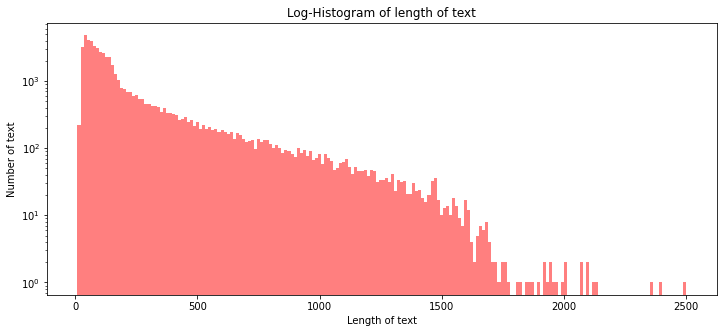

In [5]:
# 텍스트의 글자수 분포

train_length = train_data['text'].apply(len)

plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of text')
plt.xlabel('Length of text')
plt.ylabel('Number of text')

In [6]:
print('텍스트 길이 최대 값: {}'.format(np.max(train_length)))
print('텍스트 길이 최소 값: {}'.format(np.min(train_length)))
print('텍스트 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('텍스트 길이 중간 값: {}'.format(np.median(train_length)))
print('텍스트 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('텍스트 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))
print('텍스트 길이 99%: {}'.format(np.percentile(train_length, 99)))

텍스트 길이 최대 값: 2500
텍스트 길이 최소 값: 9
텍스트 길이 평균 값: 228.12
텍스트 길이 표준편차: 276.29
텍스트 길이 중간 값: 118.0
텍스트 길이 제 1 사분위: 63.0
텍스트 길이 제 3 사분위: 265.0
텍스트 길이 99%: 1317.0


(-0.5, 799.5, 599.5, -0.5)

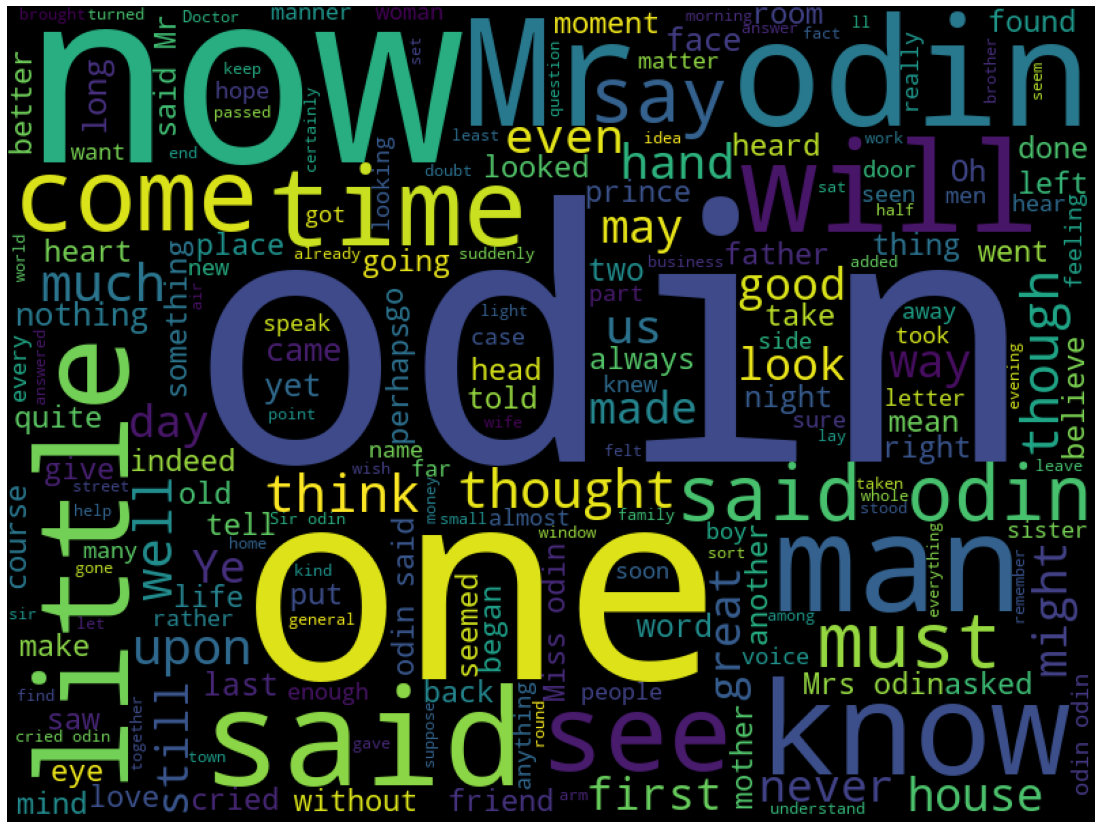

In [7]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['text']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


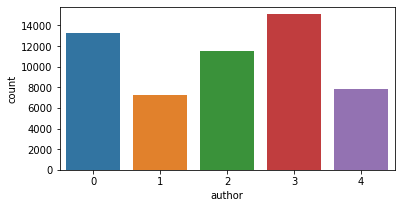

In [8]:
# 작가별 분포

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['author'])

In [9]:
print("0번 작가 데이터수: {}".format(train_data['author'].value_counts()[0]))
print("1번 작가 데이터수: {}".format(train_data['author'].value_counts()[1]))
print("2번 작가 데이터수: {}".format(train_data['author'].value_counts()[2]))
print("3번 작가 데이터수: {}".format(train_data['author'].value_counts()[3]))
print("4번 작가 데이터수: {}".format(train_data['author'].value_counts()[4]))

0번 작가 데이터수: 13235
1번 작가 데이터수: 7222
2번 작가 데이터수: 11554
3번 작가 데이터수: 15063
4번 작가 데이터수: 7805


Text(0, 0.5, 'Number of texts')

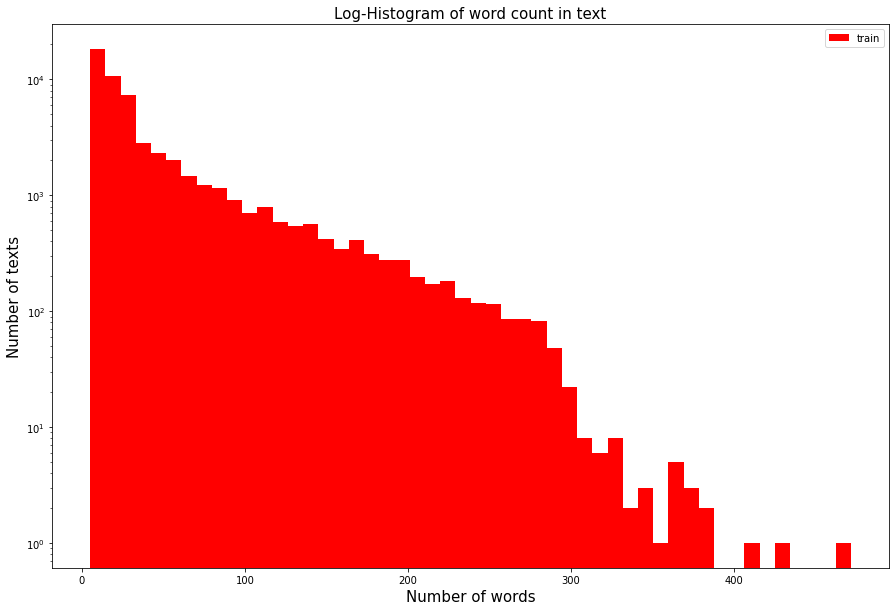

In [10]:
# 텍스트의 단어수 분포

train_word_counts = train_data['text'].apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in text', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of texts', fontsize=15)

In [11]:
print('텍스트 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('텍스트 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('텍스트 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('텍스트 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('텍스트 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('텍스트 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('텍스트 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('텍스트 단어 개수 99%: {}'.format(np.percentile(train_word_counts, 99)))

텍스트 단어 개수 최대 값: 472
텍스트 단어 개수 최소 값: 5
텍스트 단어 개수 평균 값: 42.26
텍스트 단어 개수 표준편차: 50.81
텍스트 단어 개수 중간 값: 22.0
텍스트 단어 개수 제 1 사분위: 12.0
텍스트 단어 개수 제 3 사분위: 50.0
텍스트 단어 개수 99%: 242.0


# 데이터 전처리, 토큰화, 정수인코딩, 패딩

In [12]:
def preprocessing( review, remove_stopwords = False ): 

    review_text = BeautifulSoup(review, "html5lib").get_text()
    
    # 영어가 아닌 특수문자들을 공백(" ")으로 바꾸기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)

    # 대문자들을 소문자로 바꾸고 공백단위로 텍스트들 나눠서 리스트로 만든다.
    words = review_text.lower().split()

    if remove_stopwords: 
        # 불용어들을 제거
    
        # 영어에 관련된 불용어 불러오기
        stops = set(stopwords.words("english"))
        # 불용어가 아닌 단어들로 이루어진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        # 단어 리스트를 공백을 넣어서 하나의 글로 합친다.	
        clean_review = ' '.join(words)

    else: # 불용어 제거하지 않을 때
        clean_review = ' '.join(words)

    return clean_review

In [13]:
clean_train_reviews = []
for review in train_data['text']:
  clean_train_reviews.append(preprocessing(review, remove_stopwords = True))

clean_train_reviews[0]

'almost choking much much wanted say strange exclamations came lips pole gazed fixedly bundle notes hand looked odin evident perplexity'

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [15]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  33506


In [16]:
data_configs = {} # 단어 사전

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [17]:
MAX_SEQUENCE_LENGTH = 242

train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (54879, 242)


In [18]:
train_labels = np.array(train_data['author'])

print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (54879,)


# 모델 생성, 학습, 평가

In [20]:
input_dim = np.max(train_inputs) + 1
embedding_dims = 20

In [21]:
y = to_categorical(train_labels)

In [22]:
def create_model(embedding_dims=20, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [24]:
epochs = 25
x_train, x_test, y_train, y_test = train_test_split(train_inputs, y, test_size=0.2)

model = create_model()
hist = model.fit(x_train, y_train,
                 batch_size=16,
                 validation_data=(x_test, y_test),
                 epochs=epochs,
                 callbacks=[es, mc])

Epoch 1/25
2744/2744 [==============================] - 24s 8ms/step - loss: 1.5642 - accuracy: 0.2813 - val_loss: 1.4873 - val_accuracy: 0.3664

Epoch 00001: val_loss improved from inf to 1.48733, saving model to best_model.h5
Epoch 2/25
2744/2744 [==============================] - 20s 7ms/step - loss: 1.4386 - accuracy: 0.4362 - val_loss: 1.2964 - val_accuracy: 0.5409

Epoch 00002: val_loss improved from 1.48733 to 1.29643, saving model to best_model.h5
Epoch 3/25
2744/2744 [==============================] - 20s 7ms/step - loss: 1.2351 - accuracy: 0.5490 - val_loss: 1.1306 - val_accuracy: 0.5962

Epoch 00003: val_loss improved from 1.29643 to 1.13059, saving model to best_model.h5
Epoch 4/25
2744/2744 [==============================] - 21s 8ms/step - loss: 1.0660 - accuracy: 0.6186 - val_loss: 1.0125 - val_accuracy: 0.6487

Epoch 00004: val_loss improved from 1.13059 to 1.01247, saving model to best_model.h5
Epoch 5/25
2744/2744 [==============================] - 21s 8ms/step - loss:

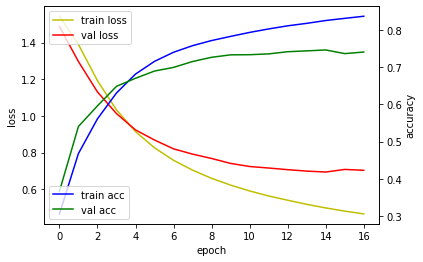

In [25]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 모델로 예측하기

In [28]:
testfile = files.upload()

Saving test_x.csv to test_x.csv


In [29]:
test_data = pd.read_csv(io.BytesIO(testfile['test_x.csv']))
test_data.head()

,index,text
0,0,“Not at all. I think she is one of the most ch...
1,1,"""No,"" replied he, with sudden consciousness, ""..."
2,2,As the lady had stated her intention of scream...
3,3,“And then suddenly in the silence I heard a so...
4,4,His conviction remained unchanged. So far as I...


In [30]:
len(test_data)

19617

In [31]:
clean_test_reviews = []
for review in test_data['text']:
    clean_test_reviews.append(preprocessing(review, remove_stopwords = True))

In [32]:
clean_test_reviews[:5]

['think one charming young ladies ever met might useful work decided genius way witness way preserved agra plan papers father love emotional thing whatever emotional opposed true cold reason place things never marry lest bias judgment',
 'replied sudden consciousness find cannot ignorant goodness owe feel would express could well know orator',
 'lady stated intention screaming course would screamed additional boldness exertion rendered unnecessary hasty knocking door sooner heard mr odin darted much agility wine bottles began dusting great violence matron sharply demanded',
 'suddenly silence heard sound sent heart mouth clank levers swish leaking cylinder set engine work lamp still stood upon floor placed examining trough light saw black ceiling coming upon slowly jerkily none knew better force must within minute grind shapeless pulp threw screaming door dragged nails lock implored odin let remorseless clanking levers drowned cries ceiling foot two head hand upraised could feel hard r

In [33]:
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [34]:
test_inputs

array([[  20,    3, 1392, ...,    0,    0,    0],
       [ 109,  435, 1387, ...,    0,    0,    0],
       [ 102, 3435, 1235, ...,    0,    0,    0],
       ...,
       [   1,  442, 1619, ...,    0,    0,    0],
       [ 105,    8,    1, ...,    0,    0,    0],
       [ 579, 6184,    7, ...,    0,    0,    0]], dtype=int32)

In [35]:
loaded_model = load_model('best_model.h5')

In [36]:
result = loaded_model.predict_proba(test_inputs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [37]:
result = pd.DataFrame(result)

In [38]:
result.head()

,0,1,2,3,4
0,0.001942,9.681048e-01,0.020344,8.851844e-03,0.000757
1,0.134731,4.978045e-01,0.073192,9.662969e-03,0.284609
2,0.998909,5.219125e-04,0.000040,4.789513e-06,0.000525
3,0.000027,4.208079e-11,0.998872,3.273211e-09,0.001101
4,0.889215,2.982553e-02,0.009294,5.441769e-02,0.017248


In [39]:
result.shape

(19617, 5)

In [40]:
index_col = list(range(len(result)))

In [41]:
result.insert(0, 'index', index_col)

In [42]:
result.head()

,index,0,1,2,3,4
0,0,0.001942,9.681048e-01,0.020344,8.851844e-03,0.000757
1,1,0.134731,4.978045e-01,0.073192,9.662969e-03,0.284609
2,2,0.998909,5.219125e-04,0.000040,4.789513e-06,0.000525
3,3,0.000027,4.208079e-11,0.998872,3.273211e-09,0.001101
4,4,0.889215,2.982553e-02,0.009294,5.441769e-02,0.017248


In [43]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [44]:
result.to_csv( '/content/gdrive/My Drive/Colab Notebooks/result.csv', index=False)

# 셀프 어텐션 모델

In [45]:
import tensorflow as tf

In [46]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)


    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'embedding_dim' : self.embedding_dim,
          'num_heads' : self.num_heads,
          'projection_dim' : self.projection_dim,
          'query_dense' : self.query_dense,
          'key_dense' : self.key_dense,
          'value_dense' : self.value_dense,
          'dense' : self.dense,
      })
      return config


    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

In [47]:
# 인코더 설계하기

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

 
    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'att' : self.att,
          'ffn' : self.ffn,
          'layernorm1' : self.layernorm1,
          'layernorm2' : self.layernorm2,
          'dropout1' : self.dropout1,
          'dropout2' : self.dropout2,
      })
      return config


    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [48]:
# 포지션 임베딩

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

 
    def get_config(self):
      config = super().get_config().copy()
      config.update({
          'token_emb' : self.token_emb,
          'pos_emb' : self.pos_emb,
      })
      return config


    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [49]:
# 트랜스포머를 이용한 분류

embedding_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
dff = 32  # Hidden layer size in feed forward network inside transformer

max_len = MAX_SEQUENCE_LENGTH
vocab_size = len(word_vocab)

inputs = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

In [50]:
model2.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])

In [51]:
epochs = 5


x_train2, x_test2, y_train2, y_test2 = train_test_split(train_inputs, train_labels, test_size=0.2)


hist2 = model2.fit(x_train2, y_train2,
                 batch_size=32,
                 validation_data=(x_test2, y_test2),
                 epochs=epochs)

Epoch 1/5
1372/1372 [==============================] - 26s 18ms/step - loss: 1.4948 - accuracy: 0.3220 - val_loss: 0.8799 - val_accuracy: 0.6627
Epoch 2/5
1372/1372 [==============================] - 24s 18ms/step - loss: 0.7782 - accuracy: 0.7095 - val_loss: 0.7744 - val_accuracy: 0.7087
Epoch 3/5
1372/1372 [==============================] - 24s 18ms/step - loss: 0.5412 - accuracy: 0.8051 - val_loss: 0.7667 - val_accuracy: 0.7356
Epoch 4/5
1372/1372 [==============================] - 25s 18ms/step - loss: 0.4170 - accuracy: 0.8494 - val_loss: 0.8115 - val_accuracy: 0.7346
Epoch 5/5
1372/1372 [==============================] - 24s 18ms/step - loss: 0.3489 - accuracy: 0.8737 - val_loss: 0.9215 - val_accuracy: 0.7249


# 모델로 예측하기2

In [52]:
result2 = model2.predict(test_inputs)

In [53]:
result2

array([[5.7518220e-04, 8.3588696e-01, 8.6540729e-02, 7.6249599e-02,
        7.4754370e-04],
       [6.6763656e-03, 9.1628474e-01, 1.4464165e-02, 4.2357516e-02,
        2.0217206e-02],
       [9.9919671e-01, 7.2529190e-04, 3.2893742e-05, 8.2702554e-06,
        3.6823469e-05],
       ...,
       [1.9467289e-04, 9.9958867e-01, 3.0812276e-05, 1.3800847e-04,
        4.7745925e-05],
       [8.4736872e-05, 9.9970406e-01, 2.6049654e-05, 1.3276603e-04,
        5.2321106e-05],
       [9.9826032e-01, 7.1372930e-04, 6.0287822e-04, 5.7786078e-06,
        4.1716846e-04]], dtype=float32)

In [54]:
result2 = pd.DataFrame(result2)

In [55]:
result2.insert(0, 'index', index_col)

In [56]:
result2.to_csv( '/content/gdrive/My Drive/Colab Notebooks/result2.csv', index=False)